In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from flask import Flask, request, render_template
import re
import matplotlib.pyplot as plt
import json
import numpy as np
import nltk
import seaborn as sns

In [6]:
credit = pd.read_csv(r'/Users/iqrabismi/Desktop/tmdb_5000_credits.csv')

In [7]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [73]:
movies= pd.read_csv(r'/Users/iqrabismi/Desktop/tmdb_5000_movies.csv')

In [70]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Data Preprocessing and EDA

In [10]:
movies.isna().sum() #checking for nulls

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [11]:
len(movies)

4803

In [14]:
movies[movies.tagline.isna()==True].head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400
56,185000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.startrekmovie.com/,188927,"[{""id"": 9663, ""name"": ""sequel""}, {""id"": 9743, ...",en,Star Trek Beyond,The USS Enterprise crew explores the furthest ...,65.352913,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-07-07,343471816,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Star Trek Beyond,6.6,2568
66,175000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://disney.go.com/disneypictures/up/,14160,"[{""id"": 965, ""name"": ""age difference""}, {""id"":...",en,Up,Carl Fredricksen spent his entire life dreamin...,92.201962,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,735099082,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Up,7.7,6870


In [ ]:
#### extracting genres and keywords from json column

In [75]:
import json

movies['genres'] = movies['genres'].apply(lambda x: [d['name'] for d in json.loads(x)])


In [77]:
import json

movies['keywords'] = movies['keywords'].apply(lambda x: [d['name'] for d in json.loads(x)])


In [78]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [94]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [93]:
### Converting realease data to datetime

movies['release_date'] = pd.to_datetime(movies['release_date'])

### Data Quality Report for Numeric Variable

In [16]:
num_movies= movies.select_dtypes(include=['int64', 'float64'])

In [22]:
num_movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


### Data Quality Report for Categorical Variable

In [24]:
cat_movies= movies.select_dtypes(exclude=['int64', 'float64','datetime'])

In [25]:
cat_movies.describe().transpose()

,count,unique,top,freq
genres,4803,1175,"[{""id"": 18, ""name"": ""Drama""}]",370
homepage,1712,1691,http://www.missionimpossible.com/,4
keywords,4803,4222,[],412
original_language,4803,37,en,4505
original_title,4803,4801,Out of the Blue,2
overview,4800,4800,"In the 22nd century, a paraplegic Marine is di...",1
production_companies,4803,3697,[],351
production_countries,4803,469,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2977
spoken_languages,4803,544,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",3171
status,4803,3,Released,4795


### EDA

In [79]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [81]:
genre=[]
for i in movies.genres.values:
    for j in i:
        genre.append(j)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Fantasy'),
  Text(3, 0, 'Science Fiction'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Animation'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Western'),
  Text(10, 0, 'Comedy'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Horror'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'History'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'TV Movie')])

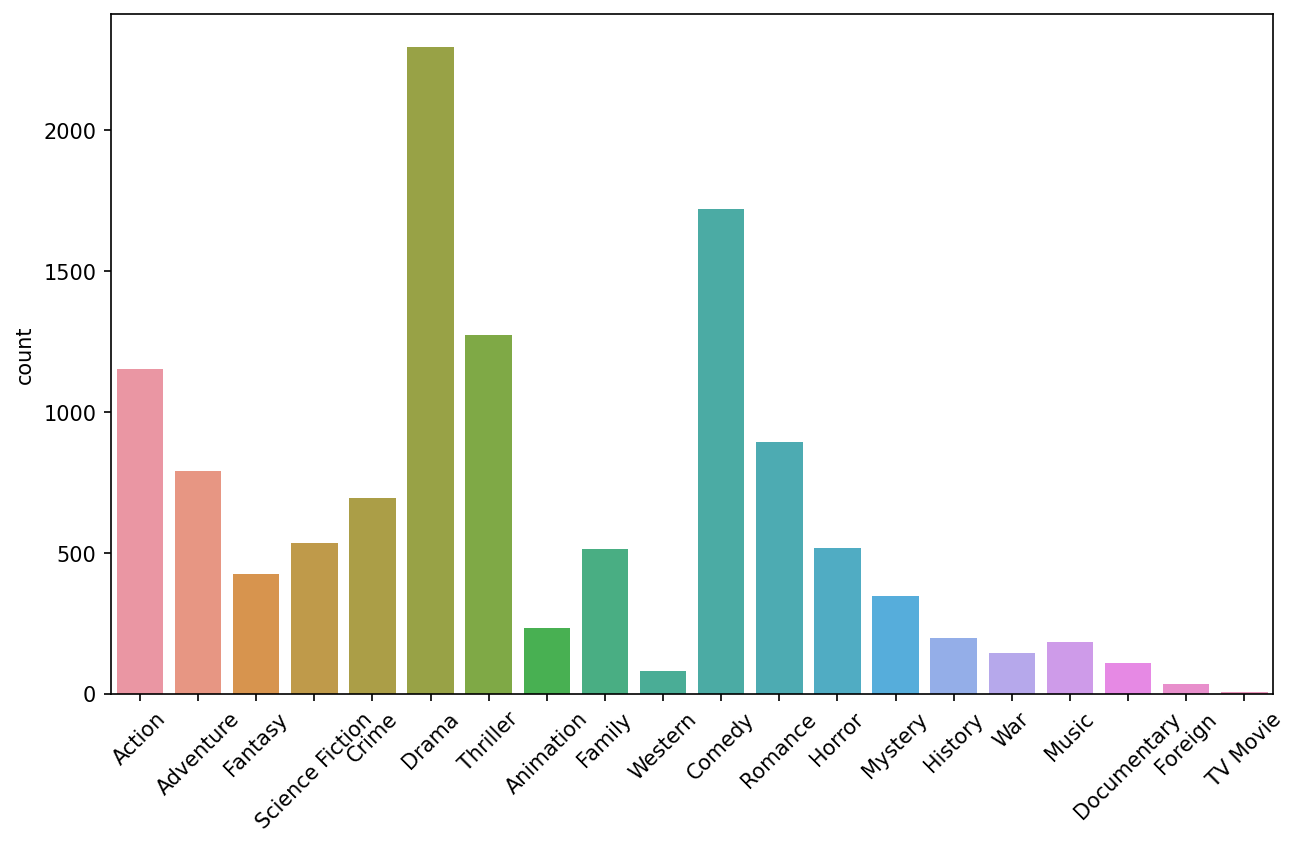

In [86]:
plt.figure(figsize=(10,6), dpi= 150)
sns.countplot(genre)
plt.xticks(rotation= 45)

In [87]:
movies1= movies.explode('genres')

In [100]:
year=movies['release_date'].dt.year

In [101]:
movies1['release_year'] = year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Fantasy'),
  Text(3, 0, 'Science Fiction'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Animation'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Western'),
  Text(10, 0, 'Comedy'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Horror'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'History'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'TV Movie')])

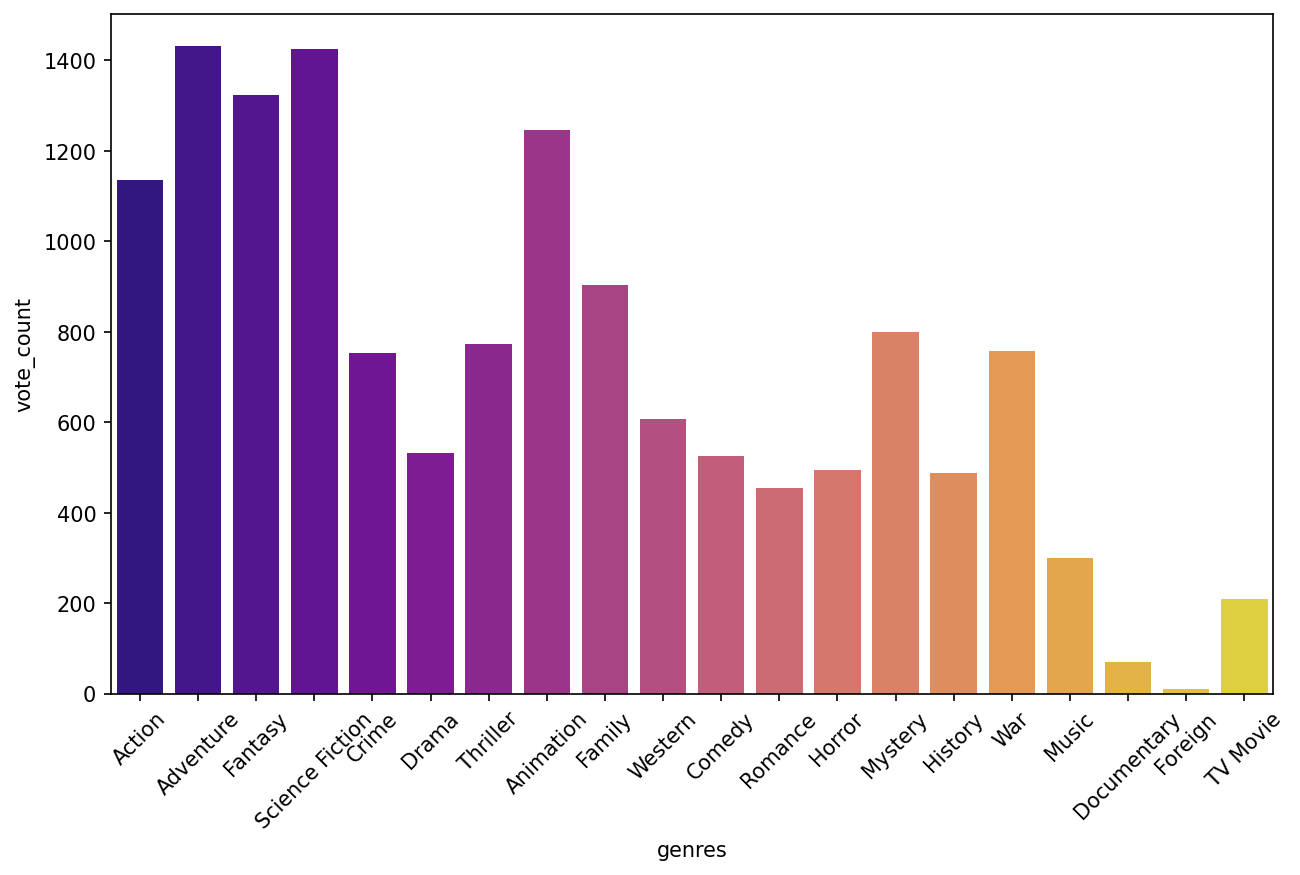

In [106]:
plt.figure(figsize=(10,6), dpi= 150)
sns.barplot(data= movies1, x= 'genres', y='vote_count', ci=None, palette='plasma')
plt.xticks(rotation= 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Fantasy'),
  Text(3, 0, 'Science Fiction'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Animation'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Western'),
  Text(10, 0, 'Comedy'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Horror'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'History'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'TV Movie')])

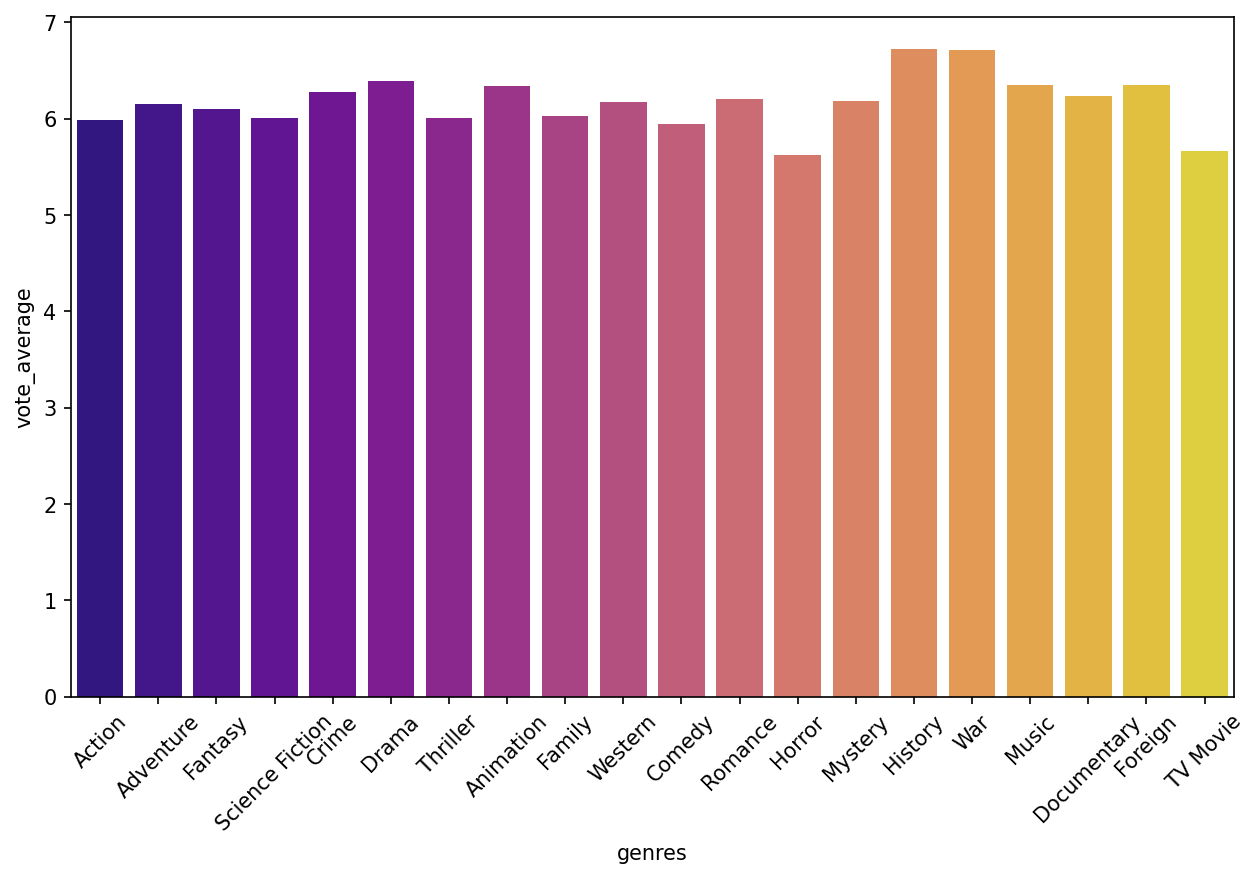

In [107]:
plt.figure(figsize=(10,6), dpi= 150)
sns.barplot(data= movies1, x= 'genres', y='vote_average', ci=None, palette='plasma')
plt.xticks(rotation= 45)

## Simple Recommendation System to recommend to Top Ranking Movies

##### From the bar plot above ,we can see that average vote across all genres are same but vote count is different. Hence, if select top movies by rating then the results might be biased. For eg, if average rating rated by 10 people is  9 whereas  average rating rated by  100 people is 8.9 then movies rated by more users is much better. However, algorithm will be biased towards higher rated value. Hence to overcome this issue we will use weighted rating 

##### Weighted Rating can be calculated by taking vote count, vote rating, min number of votes required, mean rating value.

In [114]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


#### calculating the mean value of rating

In [115]:
C= movies.vote_average.mean()

#### Finding the values of m where m is the hyper-parameter

In [127]:
# Suppose we want movies with vote count to be in the 75th percentile.
m = movies['vote_count'].quantile(0.75)
print(m)

737.0


#### Filtering for movies with vote count greater than m 

In [129]:
movies2= movies[movies.vote_count> m]

In [130]:
# Weighted Average Movie 
def weighted_rating(x, m=m, C=C):
    votecount = x['vote_count']
    rating = x['vote_average']
    return (votecount/(votecount+rating) * rating) + (m/(m+votecount) * C)


In [131]:
movies2.shape

(1200, 20)

In [132]:
movies2['score'] = movies2.apply(weighted_rating, axis=1)

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_44646/2503061566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies2['score'] = movies2.apply(weighted_rating, axis=1)


#### Sorting the movies by scores in descending order

In [134]:
movies2= movies2.sort_values('score', ascending=False)

In [135]:
movies2.head(4)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,score
4535,2000000,"[Action, Drama]",NaN,346,"[japan, samurai, peasant, looting, rice, fenci...",ja,七人の侍,A samurai answers a village's request for prot...,39.756748,"[{""name"": ""Toho Company"", ""id"": 882}]",...,1954-04-26,271841,207.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,The Mighty Warriors Who Became the Seven Natio...,Seven Samurai,8.2,878,10.904268
4238,1,"[Drama, Comedy]",NaN,3082,"[factory, ambulance, invention, tramp, great d...",en,Modern Times,The Tramp struggles to live in modern industri...,28.276480,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,1936-02-05,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856,10.842609
3984,2883848,"[Comedy, Romance]",NaN,239,"[chicago, witness, musician, mafia, cross dres...",en,Some Like It Hot,Two musicians witness a mob hit and struggle t...,39.309820,"[{""name"": ""The Mirisch Corporation"", ""id"": 219...",...,1959-03-18,25000000,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The movie too HOT for words!,Some Like It Hot,8.0,808,10.827672
3296,8000000,"[Science Fiction, Animation]",http://www.bandaivisual.co.jp/akira/,149,"[saving the world, total destruction, megacity...",ja,アキラ,Childhood friends Tetsuo and Kaneda are pulled...,39.338097,"[{""name"": ""Bandai Visual Company"", ""id"": 528},...",...,1988-07-16,553171,124.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Neo-Tokyo is about to E.X.P.L.O.D.E.,Akira,7.8,773,10.695544


#### Printing the top 20 movies 

In [137]:
movies2[['title','vote_count','vote_average','score']].head(20)

,title,vote_count,vote_average,score
4535,Seven Samurai,878,8.2,10.904268
4238,Modern Times,856,8.1,10.842609
3984,Some Like It Hot,808,8.0,10.827672
3296,Akira,773,7.8,10.695544
1663,Once Upon a Time in America,1069,8.2,10.623698
3841,Evil Dead II,742,7.6,10.558734
2550,Lawrence of Arabia,851,7.8,10.556569
501,The Little Prince,756,7.6,10.531679
3870,The Hunt,927,7.9,10.531520
4081,The Lives of Others,958,7.9,10.484313


## There are two types of recommendation system: 
1. Content Based Filtering: Content-based filtering is a method where recommendations are made based on the properties of the items that a user has liked in the past. For example, if a user has liked several movies that are similar in genre, a content-based filtering algorithm would recommend other movies in that genre to the user. The algorithm uses the characteristics of the items the user has liked to find similar items.
2. Collaborative Filtering:  Collaborative filtering is a method where recommendations are made based on the preferences of other users. For example, if several users who have similar tastes to a particular user have liked a certain item, a collaborative filtering algorithm would recommend that item to the user. Collaborative filtering algorithms can be further divided into two types: user-based and item-based. User-based collaborative filtering looks at the similarities between users, while item-based collaborative filtering looks at the similarities between items.

### 1. Content Based Recommendation

##### To build a recommendation system that suggests movies that are similar to a specific movie. we will calculate the cosine similarity between all movies based on their plot descriptions, and recommend movies that have a similarity score above a certain threshold

In [138]:
movies['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

##### To compute the similarity, we will find the word vectors using TF-IDF. TF-IDF score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
tfidf = TfidfVectorizer(stop_words='english')

In [141]:
movies['overview'] = movies['overview'].fillna('')

In [142]:
tfidf_matrix = tfidf.fit_transform(movies['overview'])

In [143]:
tfidf_matrix.shape # 20k different words in total overview

(4803, 20978)

In [147]:
tfidf.get_feature_names()[500:510]

['activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'actuary',
 'acute',
 'ad']

##### We can compute similarity score using any metrics such as manhattan, Euclidean, Jaccard,Cosine Similarit. 

##### To compute the similarity,we will calculate cosine similarity between vectors. we will use linear_kernel() as it is faster.The output will be a matrix of 4830x4830 shape, which means the cosine similarity score between each movie's overview and every other movie's overview

In [148]:
from sklearn.metrics.pairwise import linear_kernel

In [149]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [150]:
cosine_similarity.shape

(4803, 4803)

In [151]:
cosine_similarity[1] #sparse matrix

array([0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
       0.        ])

##### To map these similarity score with movies, we need to do reverse mapping

In [154]:
index = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [155]:
index.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

##### To create a recommendation function, the following steps will be taken: 
1. Obtain the index of a movie using its title.
2. Compute a list of cosine similarity scores between the selected movie and all other movies, and convert it into a list of tuples where the first element is the movie's index and the second is the similarity score.
3. Sort the list of tuples based on similarity scores.
4. Retrieve the top 10 elements from the sorted list, excluding the first element which represents the selected movie.
5. Return the titles of the movies corresponding to the indices of the top 10 elements.

In [177]:
def get_recommendations(title, cosine_similarity=cosine_similarity):
   
    idx = index[title]
    
    similarity_scores = list(enumerate(cosine_similarity[idx]))
  
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    similarity_scores = similarity_scores[1:11]
    
    movie_index = [i[0] for i in similarity_scores]

    return movies['title'].iloc[movie_index]

In [178]:
get_recommendations("Pirates of the Caribbean: At World's End")

2542    What's Love Got to Do with It
3095              My Blueberry Nights
2102                  The Descendants
1280                        Disturbia
3632             90 Minutes in Heaven
792                  Just Like Heaven
1709     Space Pirate Captain Harlock
1799                     Original Sin
2652       Bathory: Countess of Blood
4423                   Bang Bang Baby
Name: title, dtype: object

In [179]:
get_recommendations('The Godfather')

2731     The Godfather: Part II
1873                 Blood Ties
867     The Godfather: Part III
3727                 Easy Money
3623                       Made
3125                     Eulogy
3896                   Sinister
4506            The Maid's Room
3783                        Joe
2244      The Cold Light of Day
Name: title, dtype: object

### Recommender System Based on Cast, Genres, and Keywords 

In [180]:
credit.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [181]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


#### We will also build recommender system based on actors, directors, keywords and genres

In [184]:
### merging the data on movie_id

In [255]:
movies_credit= movies.merge(credit, right_on= 'movie_id', left_on= 'id', suffixes=['_movie', '_credit'])

In [256]:
movies_credit.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_movie,vote_average,vote_count,movie_id,title_credit,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


##### data in cast and crew  is present in the form of "stringified" lists

In [257]:
movies_credit['cast'] = movies_credit['cast'].apply(lambda x: [d['character'] for d in json.loads(x)])

In [258]:
def f(x):
    for i in json.loads(x):
        if i['job'] =='Director':
            return i['name']
        

In [259]:
movies_credit['director'] = movies_credit.crew.apply(f)

In [260]:
movies_credit[['title_movie', 'cast', 'director', 'keywords', 'genres']].head(3)

,title_movie,cast,director,keywords,genres
0,Avatar,"[Jake Sully, Neytiri, Dr. Grace Augustine, Col...",James Cameron,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Captain Jack Sparrow, Will Turner, Elizabeth ...",Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]"
2,Spectre,"[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]"


An important step in preprocessing is to remove spaces between words. This is done so that the vectorizer can distinguish between similar words that are used in different contexts. For example, the names "Tom Hank" and "Tom Sully" will be transformed to "tomhank" and "tomsully" respectively, which the vectorizer will be able to differentiate. This way the vectorizer will not treat them as the same word.

In [261]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [262]:
for feature in features:
    movies_credit[feature] = movies_credit[feature].apply(clean_data)

In [263]:
def mix(x):
    return ' '.join(x['keywords'] or []) + ' ' + ' '.join(x['cast'] or []) + ' ' + (x['director'] or "") + ' ' + ' '.join(x['genres'] or [])

In [264]:
movies_credit['mix'] = movies_credit.apply(mix, axis=1)

In [265]:
movies_credit['mix'].head(3)

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 bri...
Name: mix, dtype: object

#####  To convert these sentences into vector we will use countvectorizer instead of TF-IDF because we dont want to downsample the actor/director if they have worked in more than one movies. 

In [266]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_credit['mix'])

In [267]:
count_matrix.shape

(4803, 72869)

#### Computing the Cosine Similarity

In [268]:
from sklearn.metrics.pairwise import cosine_similarity

In [269]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [270]:
cosine_sim2.shape

(4803, 4803)

In [271]:
indices = pd.Series(movies_credit.index, index= movies_credit['title_movie'])

In [272]:
indices.head(3)

title_movie
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
dtype: int64

In [273]:
def get_recommendations2(title, cosine_similarity=cosine_sim2):
   
    idx = indices[title]
    
    similarity_scores = list(enumerate(cosine_sim2[idx]))
  
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    similarity_scores = similarity_scores[1:11]
    
    movie_index = [i[0] for i in similarity_scores]

    return movies['title'].iloc[movie_index]

In [283]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [287]:
for i in movies.title.unique():
    print(i)

Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
John Carter
Spider-Man 3
Tangled
Avengers: Age of Ultron
Harry Potter and the Half-Blood Prince
Batman v Superman: Dawn of Justice
Superman Returns
Quantum of Solace
Pirates of the Caribbean: Dead Man's Chest
The Lone Ranger
Man of Steel
The Chronicles of Narnia: Prince Caspian
The Avengers
Pirates of the Caribbean: On Stranger Tides
Men in Black 3
The Hobbit: The Battle of the Five Armies
The Amazing Spider-Man
Robin Hood
The Hobbit: The Desolation of Smaug
The Golden Compass
King Kong
Titanic
Captain America: Civil War
Battleship
Jurassic World
Skyfall
Spider-Man 2
Iron Man 3
Alice in Wonderland
X-Men: The Last Stand
Monsters University
Transformers: Revenge of the Fallen
Transformers: Age of Extinction
Oz: The Great and Powerful
The Amazing Spider-Man 2
TRON: Legacy
Cars 2
Green Lantern
Toy Story 3
Terminator Salvation
Furious 7
World War Z
X-Men: Days of Future Past
Star Trek Into Darkness
Jack the Giant 

In [294]:
get_recommendations('A.I. Artificial Intelligence')# based on item features

419                    Jumper
1845            Hide and Seek
2146           The Stepfather
792          Just Like Heaven
674                 Astro Boy
4398         Creative Control
2201    Bullets Over Broadway
4115               House of D
1928               Straw Dogs
2817                 WarGames
Name: title, dtype: object

In [295]:
get_recommendations2('A.I. Artificial Intelligence')# based on actor, director and genre

168     Final Fantasy: The Spirits Within
1354                         Space Chimps
674                             Astro Boy
514                 Ice Age: The Meltdown
67                     Monsters vs Aliens
430                         Lilo & Stitch
1198             Escape from Planet Earth
1825            Jimmy Neutron: Boy Genius
347     Cloudy with a Chance of Meatballs
202                                 Rio 2
Name: title, dtype: object

## 2. Collaborative Filtering based on correlation scores

##### First we will normalise the rating. 

In [292]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [293]:
credit.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [296]:
moviestitle= pd.read_csv(r'/Users/iqrabismi/Desktop/Movie_Id_Titles (1).csv')

In [302]:
moviestitle.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [303]:
rating= pd.read_csv(r'/Users/iqrabismi/Desktop/ratings_small.csv')

In [304]:
rating.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [312]:
df = rating.merge(moviestitle, left_on='movieId', right_on= 'item_id')


In [313]:
df.head(3)

,userId,movieId,rating,timestamp,item_id,title
0,1,31,2.5,1260759144,31,Crimson Tide (1995)
1,7,31,3.0,851868750,31,Crimson Tide (1995)
2,31,31,4.0,1273541953,31,Crimson Tide (1995)


In [315]:
# movies with most rating
df.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Client, The (1994)         341
Promesse, La (1996)        324
Schindler's List (1993)    311
Stalingrad (1993)          304
Event Horizon (1997)       291
Name: rating, dtype: int64

In [316]:
# top five movies wrt average rating
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

title
Promise, The (Versprechen, Das) (1994)    5.0
Fair Game (1995)                          5.0
Pompatus of Love, The (1996)              5.0
Love Jones (1997)                         5.0
That Thing You Do! (1996)                 5.0
Name: rating, dtype: float64

In [317]:
# creating a new dataframe with 'rating' count values
df1 = pd.DataFrame(df.groupby('title')['rating'].mean()) 
  
df1['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
  
df1.head()


,rating,num of ratings
title,,
'Til There Was You (1997),4.052632,19
1-900 (1994),2.961538,13
101 Dalmatians (1996),3.173077,52
12 Angry Men (1957),4.700000,5
187 (1997),2.700000,10


Text(0, 0.5, 'count of users')

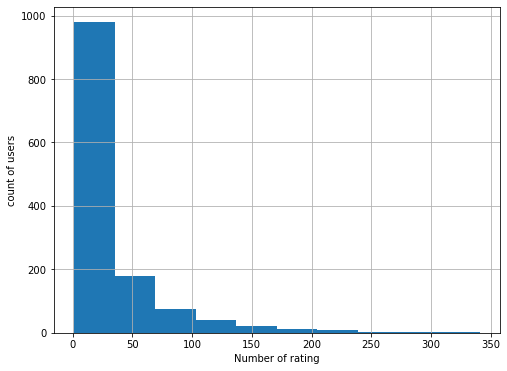

In [320]:
plt.figure(figsize=(8,6))
df1['num of ratings'].hist()
plt.xlabel('Number of rating')
plt.ylabel('count of users')

In [323]:
df1.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
"Client, The (1994)",4.054252,341
"Promesse, La (1996)",4.256173,324
Schindler's List (1993),4.487138,311
Stalingrad (1993),4.138158,304
Event Horizon (1997),4.221649,291
North by Northwest (1959),3.706204,274
Toy Story (1995),3.872470,247
Gandhi (1982),4.303279,244
"Wild Bunch, The (1969)",4.006329,237


In [372]:
##pivot the table
pivot_df= pd.pivot_table(data= df,index='userId', columns='title', values='rating')

In [373]:
pivot_df.head(3)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"Wooden Man's Bride, The (Wu Kui) (1994)","Wrong Trousers, The (1993)",You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


##### Normalising the ratings because This results in positive or negative values, which can be used to classify users into similar groups. By normalizing the data, we can create clusters of users who give similar ratings to similar items. These clusters can then be used to make personalized recommendations to users.

In [374]:
means= pivot_df.mean(axis= 1)

In [375]:
means

userId
1      2.458333
2      3.486842
3      3.478261
4      4.520000
5      3.909091
         ...   
667    3.647059
668    4.000000
669    3.818182
670    3.842105
671    4.104651
Length: 669, dtype: float64

In [376]:
pivot_df= pivot_df.subtract(means, axis= 0 )

In [378]:
pivot_df.head(4)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"Wooden Man's Bride, The (Wu Kui) (1994)","Wrong Trousers, The (1993)",You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.486842,NaN,NaN,NaN,NaN,NaN,0.513158,NaN,...,NaN,NaN,NaN,-0.486842,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.478261,NaN
4,NaN,NaN,NaN,NaN,NaN,-0.52,0.48,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
# analysing correlation with similar movies
title1= pivot_df["Star Wars (1977)"]
  
title1.head()

userId
1         NaN
2    0.513158
3         NaN
4         NaN
5         NaN
Name: Star Wars (1977), dtype: float64

In [380]:
title2 = pivot_df['Liar Liar (1997)']
title2.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Liar Liar (1997), dtype: float64

In [381]:
# Computing correlation values with similar movies using corr_with which is used to calculate correlation between 
#two dataframes
starwars_similarmovies = pivot_df.corrwith(title1).reset_index()
liarliar_similarmovies = pivot_df.corrwith(title2).reset_index()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [382]:
starwars_similarmovies.columns= ['title','correlation']
starwars_similarmovies.dropna(inplace=True)
starwars_similarmovies.head(3)

,title,correlation
0,'Til There Was You (1997),-0.056151
1,1-900 (1994),-0.340100
2,101 Dalmatians (1996),-0.047712


In [383]:
df1.head(2)

,rating,num of ratings
title,,
'Til There Was You (1997),4.052632,19
1-900 (1994),2.961538,13


In [384]:
merged_data= starwars_similarmovies.merge(df1, on='title')

In [385]:
merged_data.head(3)

,title,correlation,rating,num of ratings
0,'Til There Was You (1997),-0.056151,4.052632,19
1,1-900 (1994),-0.340100,2.961538,13
2,101 Dalmatians (1996),-0.047712,3.173077,52


##### Similar Movies for Star wars based on similar user's ratings

In [386]:
merged_data[merged_data['num of ratings']>100].sort_values('correlation', ascending=False)

,title,correlation,rating,num of ratings
899,Star Wars (1977),1.000000,4.370647,201
654,Mortal Kombat (1995),0.513553,4.037671,146
861,Sling Blade (1996),0.331058,3.963303,109
881,Spellbound (1945),0.322826,4.256696,224
820,"Savage Nights (Nuits fauves, Les) (1992)",0.312140,4.232906,234
...,...,...,...,...
14,Ace Ventura: When Nature Calls (1995),-0.236666,3.777500,200
84,Bastard Out of Carolina (1996),-0.241031,3.472727,110
1057,Young Frankenstein (1974),-0.282210,2.752212,113
934,Terminal Velocity (1994),-0.311504,3.112403,129


##### Similar Movies for Liar-liar based on similar user's ratings

In [387]:
liarliar_similarmovies.columns= ['title','correlation']
liarliar_similarmovies.dropna(inplace=True)
liarliar_similarmovies.head(3)

,title,correlation
8,3 Ninjas: High Noon At Mega Mountain (1998),-1.0
15,Ace Ventura: When Nature Calls (1995),1.0
27,Air Force One (1997),-1.0


In [388]:
merged_data2= liarliar_similarmovies.merge(df1, on='title')

In [389]:
merged_data2.head(3)

,title,correlation,rating,num of ratings
0,3 Ninjas: High Noon At Mega Mountain (1998),-1.0,3.941176,17
1,Ace Ventura: When Nature Calls (1995),1.0,3.777500,200
2,Air Force One (1997),-1.0,3.750000,90


In [391]:
merged_data2[merged_data['num of ratings']>100].sort_values('correlation', ascending=False)

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_44646/2371741739.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_data2[merged_data['num of ratings']>100].sort_values('correlation', ascending=False)


,title,correlation,rating,num of ratings
14,Die Hard (1988),1.000000,3.326923,26
42,Men in Black (1997),1.000000,3.576923,13
37,Jaws 2 (1978),-0.076227,4.000000,8
58,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,-1.000000,3.884615,104
43,My Left Foot (1989),-1.000000,3.750000,78
65,Swingers (1996),-1.000000,3.902500,200


### Deployment

In [276]:
import pickle

In [280]:
filename = 'deploy_models.sav'
pickle.dump(get_recommendations, open(filename, 'wb'))

In [281]:
loaded_model = pickle.load(open('deploy_model.sav', 'rb'))

In [282]:
loaded_model('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object